<a href="https://colab.research.google.com/github/andresvidal27/MLF_Labs_Andr-s_Vidal_Mira/blob/main/Lab3/mpa_mlf_svm_2students_comments_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X, y = iris.data[:, :4], iris.target
X, y = X[y < 2], y[y < 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
print("Model accurancy:",SVMmodel.score(X_test,y_test))

Model accurancy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

In [ ]:
import matplotlib.pyplot as plt


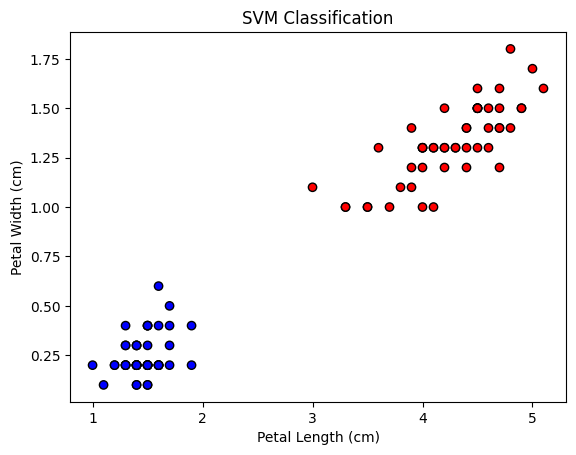

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='bwr', edgecolor='k')
plt.title('SVM Classification')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

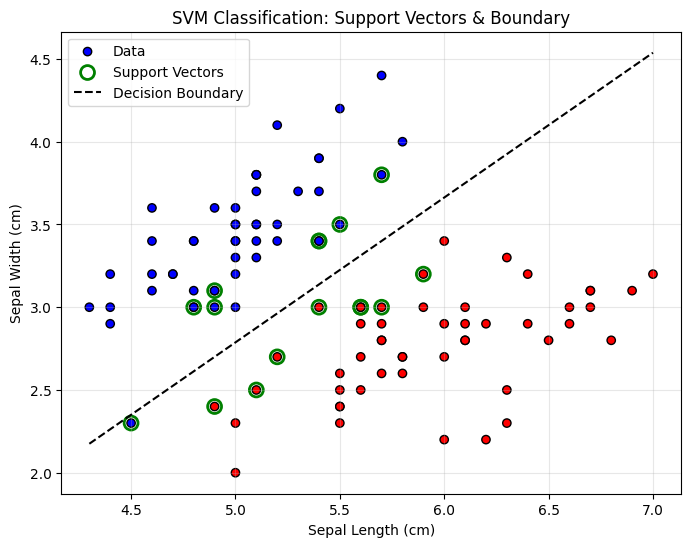

In [ ]:
# 1. Get Support Vectors
supvectors = SVMmodel.support_vectors_

# 2. Extract weights (W) and bias (b)
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

# 3. Create the plot
plt.figure(figsize=(8, 6))

# Plot all data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', label='Data')

# Highlight Support Vectors with green circles
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100,
            facecolors='none', edgecolors='green', linewidths=2,
            label='Support Vectors')

# 4. Draw the Decision Boundary line
# Formula: x1 = -(W[0]*x0 + b) / W[1]
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = -(W[0] * x0 + b) / W[1]
plt.plot(x0, x1, "k--", label='Decision Boundary')

# 5. Add Labels and Title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Classification: Support Vectors & Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

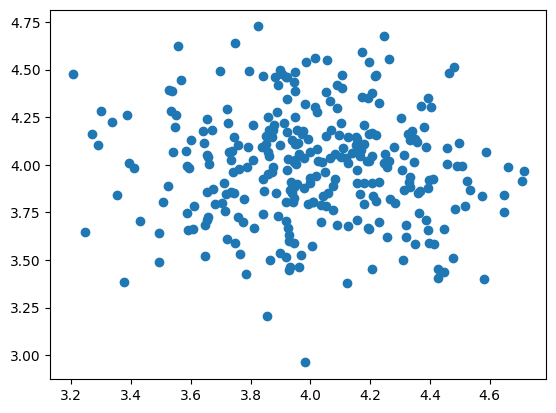

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

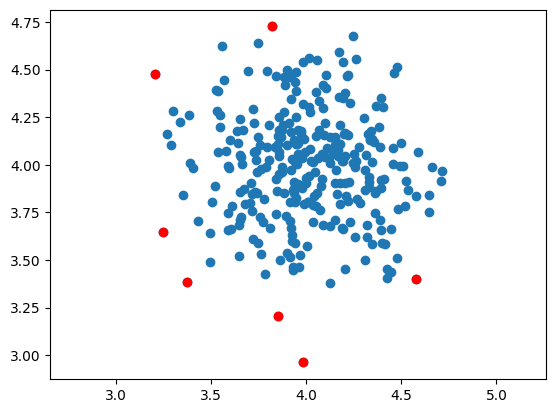

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

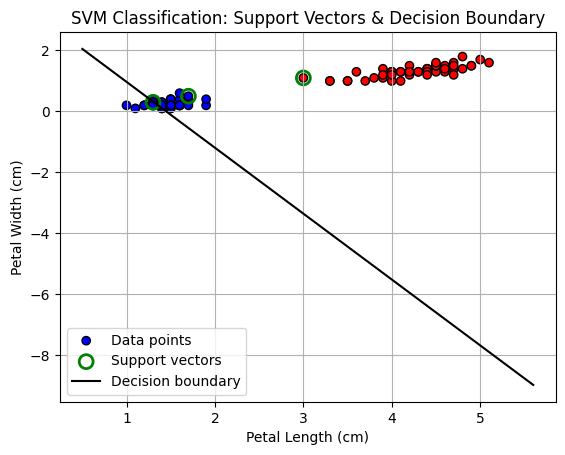

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='bwr', edgecolor='k', label='Data points')

# Plot support vectors (features 2 and 3)
plt.scatter(supvectors[:, 2], supvectors[:, 3], s=100, facecolors='none', edgecolors='green', linewidth=2, label='Support vectors')

# Get decision boundary coefficients for features 2 and 3
w_petal_length = W[0, 2]
w_petal_width = W[0, 3]
bias = b[0]

# Calculate decision line (y = (-w_len * x - bias) / w_width)
x_min, x_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
xx = np.linspace(x_min, x_max, 100)
yy = (-w_petal_length * xx - bias) / w_petal_width

# Plot decision boundary
plt.plot(xx, yy, 'k-', label='Decision boundary')

plt.title('SVM Classification: Support Vectors & Decision Boundary')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


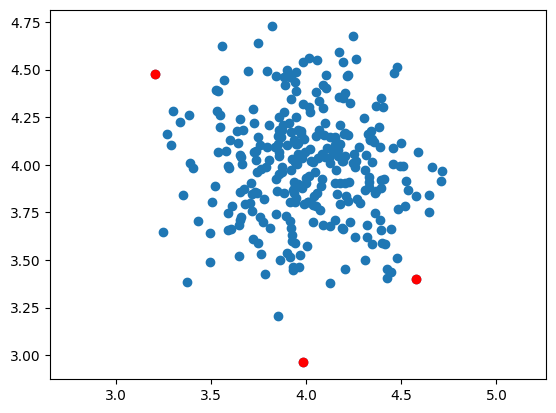

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

# Task
Revise the notebook to demonstrate SVM classification using the first two features (sepal length and sepal width) and the first two classes of the Iris dataset. This includes modifying data preparation in cell `8FVrzRdwPW5k`, updating the scatter plot in cell `Se5LDrihRkeb` with appropriate axis labels, adjusting cell `RJcyvEHKsR8T` to visualize the support vectors and decision boundary for these two features, and training an SVM classifier with a specified regularization parameter `C` (e.g., `C=200`) in cell `vpOHSYlCwdED`, reporting its accuracy. Finally, ensure the entire notebook is consistent and easy to follow, clearly explaining both SVM and anomaly detection.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target  # Modified to select only the first two features
X, y = X[y < 2], y[y < 2]            # Filtered to include only the first two classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
print("Model accurancy:",SVMmodel.score(X_test,y_test))

Model accurancy: 1.0


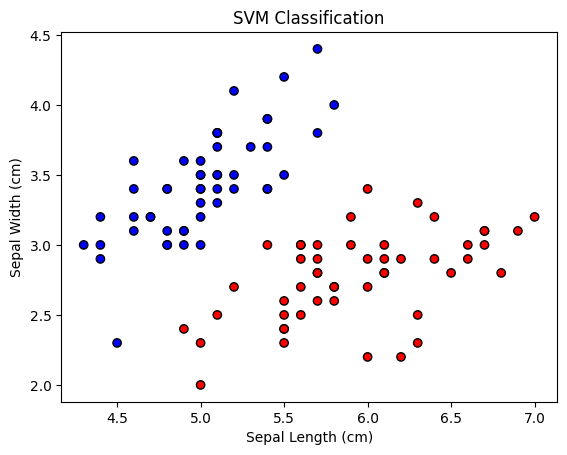

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('SVM Classification')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

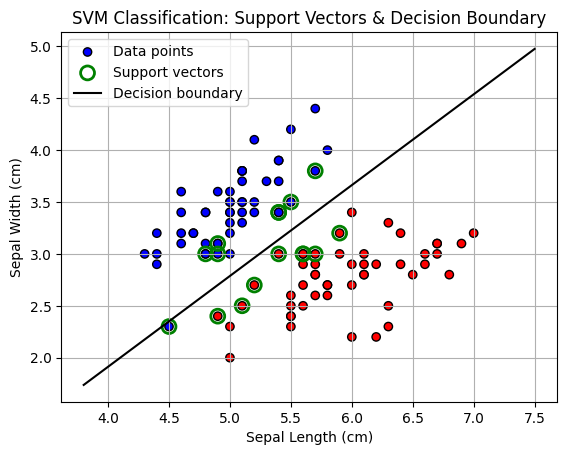

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recalculate support vectors, coefficients and intercept from the SVMmodel trained on 2 features
supvectors = SVMmodel.support_vectors_
W = SVMmodel.coef_
b = SVMmodel.intercept_

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', label='Data points')

# Plot support vectors (first two features)
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='green', linewidth=2, label='Support vectors')

# Get decision boundary coefficients for the first two features
w0 = W[0, 0]
w1 = W[0, 1]
bias = b[0]

# Determine the range for the x-axis (sepal length)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
xx = np.linspace(x_min, x_max, 100)

# Calculate the corresponding y-values for the decision boundary line
# Handle the case where w1 is zero to prevent division by zero, though unlikely in a trained SVM
if w1 != 0:
    yy = (-w0 * xx - bias) / w1
else:
    yy = np.full_like(xx, -bias / w0) # Vertical line if w1 is zero

# Plot decision boundary
plt.plot(xx, yy, 'k-', label='Decision boundary')

plt.title('SVM Classification: Support Vectors & Decision Boundary')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()